<a href="https://colab.research.google.com/github/lavtrada/Time-Series-Analysis/blob/main/Stock%20Market%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("AppleStockmarket.csv")
df=df[['Close']]
df

,Close
0,0.128348
1,0.121652
2,0.112723
3,0.115513
4,0.118862
...,...
10404,163.979996
10405,165.380005
10406,168.820007
10407,170.210007


(6765, 3644)

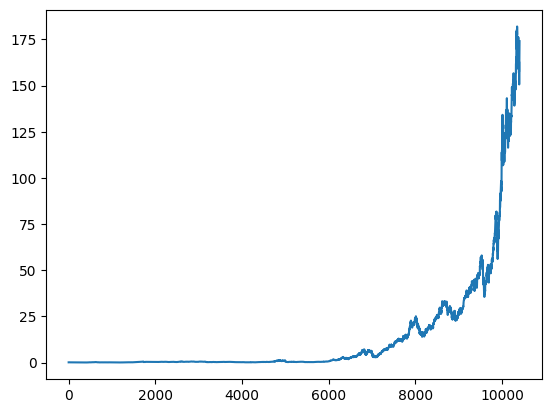

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
training_size=int(len(df)*0.65)
testing_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
training_size,testing_size

In [ ]:
import numpy
def create_database(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)



In [ ]:
time_step=180
X_train,y_train=create_database(train_data,time_step)
X_test,y_test=create_database(test_data,time_step)

In [ ]:
X_train.shape,y_train.shape
X_test.shape,y_test.shape
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 53s 416ms/step - loss: 3.7080e-05 - val_loss: 0.0066
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 415ms/step - loss: 2.1175e-07 - val_loss: 0.0061
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 423ms/step - loss: 2.1887e-07 - val_loss: 0.0065
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 424ms/step - loss: 2.8442e-07 - val_loss: 0.0059
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 78s 387ms/step - loss: 2.4953e-07 - val_loss: 0.0055
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 422ms/step - loss: 2.3804e-07 - val_loss: 0.0064
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 426ms/step - loss: 2.6165e-07 - val_loss: 0.0050
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 78s 383ms/step - loss: 2.2867e-07 - val_loss: 0.0047
Epoch 9/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 427ms/step - loss: 2.8585e-07 - val_loss: 0.0046
Epoch 10/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 425ms/step - loss: 1.7872e-07 - val_loss: 0.0040
Epoch 11/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 76s 367ms/step - 

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
import numpy
look_back=100
trainPredictPlot=numpy.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
testPredictPlot=numpy.empty_like(df)
testPredictPlot[:, :]=numpy.nan
# testPredictPlot
testPredictPlot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict), :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
import numpy as np

lst_output = []
n_steps = 1000
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df)


In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[10309:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))